Start by importing the utilities:

In [1]:
import import_ipynb
import astrid_python as ast
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 

importing Jupyter notebook from astrid_python.ipynb


Define the snapshot number.

In [2]:
snap = 214

Load the snapshot data and open the snapshot header.

In [3]:
pig = ast.getSnapshot(snap)

scale_fac, redshift, Lbox, hh, om0, omb, oml, Nfof, sigma8 = ast.getAttributes(pig)

----------PIG File Info------------
Redshift = 3.00
Lbox = 250000 ckpc/h
NfofGroups = 193500739
------Cosmological Parameters-----
h = 0.6774
Omega_m = 0.3089
Omega_b = 0.0486
Omega_l = 0.6911


Return the properties available for a given snapshot block.

In [4]:
ast.getProperties(pig, '4')

['GroupID',
 'ID',
 'Mass',
 'Metallicity',
 'Metals',
 'Position',
 'StarFormationTime',
 'TotalMassReturned',
 'Velocity']

Load values of a specificed property for a list of group/subgroup indices.

In [5]:
ast.getValues(snap, [1, 2, 5, 10, 28], 'SubhaloCM', subgroup=True)

{1: array([[ 33942.906, 228673.34 , 122080.3  ],
        [ 34625.027, 229234.16 , 123013.   ],
        [ 33917.285, 228794.56 , 121890.055],
        ...,
        [ 34891.85 , 230893.45 , 122654.02 ],
        [ 34378.15 , 229063.7  , 122546.45 ],
        [ 34645.066, 229689.44 , 123482.11 ]], dtype=float32),
 2: array([[ 32508.84 , 225659.16 , 121782.33 ],
        [ 32395.598, 225432.52 , 121756.7  ],
        [ 33034.22 , 226075.8  , 121783.086],
        ...,
        [ 32468.414, 226161.55 , 121988.984],
        [ 32790.46 , 225359.88 , 122594.18 ],
        [ 33252.195, 227158.16 , 121689.016]], dtype=float32),
 5: array([[184622.3  , 192414.   ,  67915.67 ],
        [184508.11 , 191626.72 ,  68346.445],
        [183946.75 , 193092.47 ,  67388.805],
        ...,
        [184336.14 , 192631.84 ,  68073.29 ],
        [184789.72 , 192178.92 ,  68270.35 ],
        [184924.67 , 192260.72 ,  67612.7  ]], dtype=float32),
 10: array([[174174.73, 153527.28, 162020.12],
        [174486.78, 153592

Load values of a specified particle type and property for a given group/subgroup index.

In [6]:
coordinates = ast.getParticleProperties(snap, 1, '5', 'Coordinates')

We plot the x,y-coordinates for the black holes located in group 1.

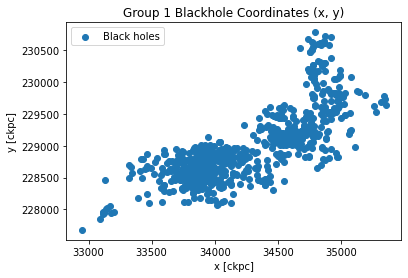

In [7]:
plt.scatter(coordinates[:,0], coordinates[:,1], label='Black holes')
plt.xlabel('x [ckpc]')
plt.ylabel('y [ckpc]')
plt.title('Group 1 Blackhole Coordinates (x, y)')
plt.legend()
plt.show()

Load the valid group/subgroup indices which satisfy conditions for a provided property:

In [8]:
validIndices = ast.getValidIndices(pig, 'Mass', 2000.0, 3000.0)

In [9]:
validIndices

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 22])

Find the indices associated with a given black hole.

In [10]:
bhid = 258052176737

In [11]:
bhidx, groupidx, subhidx = ast.getBHIndices(snap, bhid)

print('BH ID:', bhid)
print('BH Index:', bhidx)
print('BH Group Index:', groupidx)
print('BH Subhalo Index:', subhidx)

BH ID: 258052176737
BH Index: 41073
BH Group Index: 172
BH Subhalo Index: 4


Fetch the entire history of a given black hole.

In [12]:
bh = ast.getBHHistory(bhid)

In [13]:
bh

array([(258052176737, 6.60613304e-06, 0., [137843.35214572, 162095.42088167, 147406.92849157], [   3.42815963,   -8.65595116,    4.13293437], 0.00000000e+00, [ 6.94032515,  2.19190949, -2.40022548], 3.94581155e-06, 2.03655432e-01, 0.00000000e+00, 0, -1, 0, 11.69860003),
       (258052176737, 6.60813704e-06, 0., [137843.65321481, 162094.69468076, 147407.26952965], [   3.77545193,   -8.71266373,    4.02805844], 6.80468590e-06, [ 4.50228449,  1.96978156, -0.70668078], 4.35348958e-06, 3.30184926e+04, 3.86160335e-06, 0, -1, 0, 11.68203381),
       (258052176737, 6.61058375e-06, 0., [137843.98171381, 162093.96640241, 147407.60136834], [   4.1233835 ,   -8.75980922,    3.93261728], 6.59374025e-06, [ 3.98539114,  1.9701095 , -0.48551069], 4.50744251e-06, 3.15943092e+04, 4.70543814e-06, 0, -1, 0, 11.6654892 ),
       ...,
       (258052176737, 1.24850134e-03, 0., [139551.91671901, 160081.05775422, 148097.81364365], [ 201.96736991, -223.3211709 ,   25.35138677], 1.11542232e-06, [-0.13075777,  0.

Plot the trajectory of the black hole for a period of time (user defined below) during its history, as well as its mass evolution.

In [14]:
mask = bh['z'] <= 3
mask &= bh['z'] >= 2
bh = bh[mask]

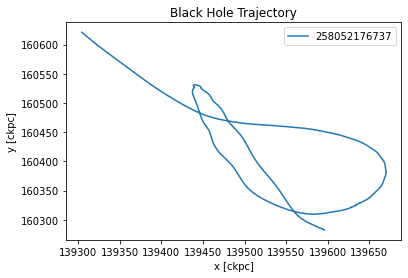

In [15]:
plt.plot(bh['BHpos'][:,0], bh['BHpos'][:,1], label=bhid)
plt.xlabel('x [ckpc]')
plt.ylabel('y [ckpc]')
plt.title('Black Hole Trajectory')
plt.legend()
plt.show()

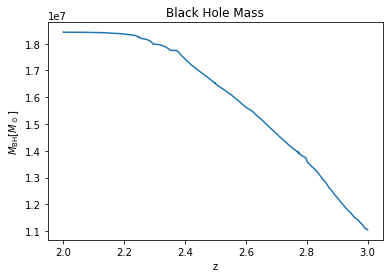

In [16]:
plt.plot(bh['z'], bh['BHMass']*1e10/hh)
plt.xlabel('z')
plt.ylabel(r'$M_{\rm BH} [M_\odot]$')
plt.title('Black Hole Mass')
plt.show()

Load the subhalo properties for a given black hole:

In [17]:
gobt, sobt, first_sub = ast.getSubfindOBT(groupidx, snap)

In [18]:
bidx, gidx, sidx, sbegin, send = ast.placeBH(groupidx, bhid, snap, gobt, sobt, first_sub)

In [19]:
subhalo_summary = ast.getSubhaloSummary(groupidx, snap, gidx, sidx, sbegin, send, feature_list=[],main_sub=False)

In [20]:
subhalo_summary

{'SubhaloCM': array([139304.3 , 160621.75, 147652.19], dtype=float32),
 'SubhaloGroupNr': 0,
 'SubhaloHalfmassRad': 4.7852955,
 'SubhaloHalfmassRadType': array([2.31012   , 5.3919897 , 0.        , 0.        , 0.9928251 ,
        0.17551477], dtype=float32),
 'SubhaloIDMostbound': 216173039833166529,
 'SubhaloLen': 78835,
 'SubhaloLenType': array([10323, 14537,     0,     0, 53972,     3], dtype=int32),
 'SubhaloMass': 12.007053,
 'SubhaloMassType': array([1.1576806e+00, 9.8091803e+00, 0.0000000e+00, 0.0000000e+00,
        1.0371922e+00, 3.0000000e-03], dtype=float32),
 'SubhaloOffsetType': array([683545, 831544,      0,      0, 917637,     46]),
 'SubhaloParentRank': 0,
 'SubhaloPos': array([139303.77, 160621.22, 147653.44], dtype=float32),
 'SubhaloRankInGr': 3,
 'SubhaloSpin': array([59.695652 ,  3.9784896, -4.1124945], dtype=float32),
 'SubhaloVel': array([ 490.3258 , -557.114  , -196.52382], dtype=float32),
 'SubhaloVelDisp': 250.43628,
 'SubhaloVmax': 252.33792,
 'SubhaloVmaxRad':

Load the subhalo properties for a given black hole from one redshift to another:

<br>

*Note: subfind not supported for many snapshots currently, example below provided for only one snapshot.*

In [21]:
ast.querySubhalos(bhid, 3.0, 3.0)

3.0


{3.0: {'SubhaloCM': array([139304.3 , 160621.75, 147652.19], dtype=float32),
  'SubhaloGroupNr': 0,
  'SubhaloHalfmassRad': 4.7852955,
  'SubhaloHalfmassRadType': array([2.31012   , 5.3919897 , 0.        , 0.        , 0.9928251 ,
         0.17551477], dtype=float32),
  'SubhaloIDMostbound': 216173039833166529,
  'SubhaloLen': 78835,
  'SubhaloLenType': array([10323, 14537,     0,     0, 53972,     3], dtype=int32),
  'SubhaloMass': 12.007053,
  'SubhaloMassType': array([1.1576806e+00, 9.8091803e+00, 0.0000000e+00, 0.0000000e+00,
         1.0371922e+00, 3.0000000e-03], dtype=float32),
  'SubhaloOffsetType': array([683545, 831544,      0,      0, 917637,     46]),
  'SubhaloParentRank': 0,
  'SubhaloPos': array([139303.77, 160621.22, 147653.44], dtype=float32),
  'SubhaloRankInGr': 3,
  'SubhaloSpin': array([59.695652 ,  3.9784896, -4.1124945], dtype=float32),
  'SubhaloVel': array([ 490.3258 , -557.114  , -196.52382], dtype=float32),
  'SubhaloVelDisp': 250.43628,
  'SubhaloVmax': 252.3